In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import Portfolio Classes

In [2]:
from vaa import VAA
from fixed_allocations import FixedAllocation

vaa = VAA()
spy = FixedAllocation('SPY',['SPY'],np.array([1]))
sf = FixedAllocation("60% Stocks & 40% Bonds",['BND', 'SPY'],np.array([0.4, 0.6]))
fs = FixedAllocation("Four Seasons",['VTI', 'TLT', 'IEF', 'GLD', 'DBC'],np.array([0.3, 0.4, 0.15, 0.075, 0.075]))
aw = FixedAllocation("All Weather",['VT', 'LTPZ', 'EDV', 'VCLT', 'EMLC', 'IAU', 'BCI'],np.array([0.35, 0.2, 0.2, 0.075, 0.075, 0.05, 0.05]))
pm = FixedAllocation("Permanent",['VTI', 'IEF', 'TLT', 'GLD'],np.array([0.25, 0.25, 0.25, 0.25]))

portfolios = [vaa, spy, sf, fs, aw, pm]

## CAGR and MDD Comparison

In [8]:
strategies = {}

for p in portfolios:
    strategies[str(p)] = {}
    strategies[str(p)]['CAGR'] = p.cagr()
    strategies[str(p)]['MDD'] = p.mdd()
    strategies[str(p)]['CAGR/MDD'] = p.cagr() / -p.mdd()

summary = pd.DataFrame(strategies)
summary.transpose()

,CAGR,MDD,CAGR/MDD
VAA,0.087358,-0.092032,0.949209
SPY,0.121619,-0.485807,0.250343
60% Stocks & 40% Bonds,0.073665,-0.319047,0.230892
Four Seasons,0.076515,-0.135792,0.563474
All Weather,0.081684,-0.107827,0.757545
Permanent,0.082984,-0.147842,0.561305


## Cummulative Returns of Portfolios

In [4]:
cummulative_returns = {}

for p in portfolios:
    cummulative_returns[str(p)] = p.port_cum_returns

In [5]:
cum_returns_df = pd.DataFrame(cummulative_returns)
cum_returns_df.dropna(inplace=True)

for port in cum_returns_df.columns:
    cum_returns_df[port] = cum_returns_df[port] / cum_returns_df.loc[cum_returns_df.index[0],port]

In [6]:
cum_returns_df

,VAA,SPY,60% Stocks & 40% Bonds,Four Seasons,All Weather,Permanent
2017-03-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2017-05-31,0.994704,1.001491,1.000260,1.000440,0.997169,0.995615
2017-06-30,0.999656,1.022076,1.013378,1.007766,1.007381,1.004465
2017-07-31,1.029639,1.025058,1.017773,1.026497,1.027634,1.026648
2017-08-31,1.037309,1.065068,1.037908,1.026677,1.026900,1.014946
2017-10-31,1.033285,1.097623,1.055622,1.038517,1.039460,1.023785
2017-11-30,1.033285,1.167578,1.091068,1.054275,1.067625,1.042115
2018-01-31,1.033285,1.125124,1.061794,1.023025,1.027322,1.015613
2018-02-28,1.033285,1.095552,1.042379,1.021816,1.024413,1.009483
2018-04-30,1.033285,1.122184,1.059482,1.039788,1.026106,1.019835


## Performance Visualization

Text(0.5, 1.0, 'Portfolio Performance Comparison')

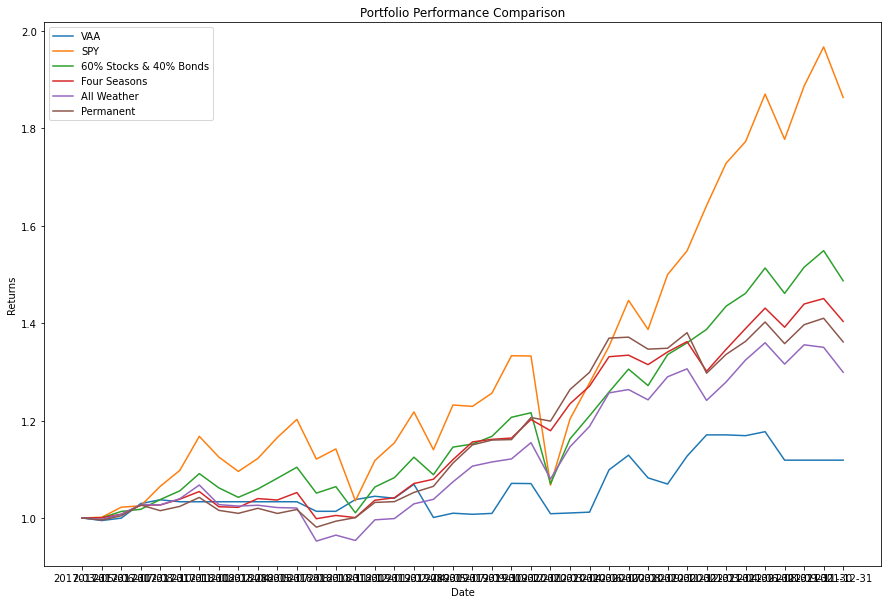

In [7]:
### Backtesting Performance Comparison (All Portfolios)
plt.figure(figsize=(15,10))
plt.plot(cum_returns_df)
plt.legend(cum_returns_df.columns)
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Portfolio Performance Comparison')
### Backtesting Performance Comparison (Original VAA, 60/40, SPY)
# sub_df = combined_df[['VAA/Original', '60/40', 'SPY']]
# plt.figure(figsize=(15,10))
# plt.plot(sub_df)
# plt.legend(sub_df.columns)
# plt.xlabel('Date')
# plt.ylabel('Returns')
# plt.title('Portfolio Performance Comparison')